# Coursework A: Curve Fitting

### Introduction
This notebook explores curve fitting using Python and numpy. We focus on implementing polynomial models with and without noise, optimising them using stochastic gradient descents, and examining their generalisation over various polynomial orders.


# Importing modules

In [1]:
# Importing relevant modules
import numpy as np
import matplotlib.pyplot as plt

# Polynomial with noise

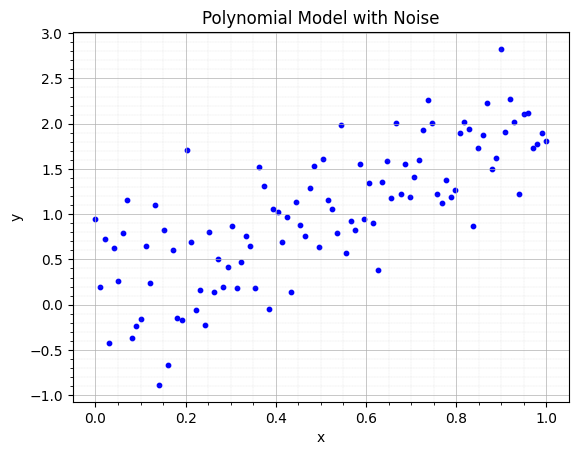

In [2]:
# Making our polynomial function with noise of 0.5:
def polyModelWithNoise(x, theta, sigma):
    '''Our function for the polynomial.
    
    Inputs:
    - x: array of values
    - theta: parameters of polynomial 
    - sigma: noise level
    
    Outputs:                                             
    '''
    
    # Creating 
    y = sum(t * x**i for i, t in enumerate(theta))                       
    
    # Creating the noise 
    noise = np.random.normal(0, sigma, size=len(x))
    
    yWnoise = y + noise

    return yWnoise

# Parameters for Q1
theta = [0, 2]
sigma = 0.5

# 100 points between 0 and 1
x= np.linspace(0, 1, 100)

# Y values
y = polyModelWithNoise(x, theta, sigma)

# Plotting Y with noise and my custom grid settings :)
plt.scatter(x, y, color='blue', s=10)
plt.title('Polynomial Model with Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()

# polyGradient:

In [3]:
def polyGradient(x,theta):
    '''A function to measure the gradient of a generated polynomial.
    
    Inputs:
    - x: array of values
    - theta: polynomial parameters
    
    Output:
    dx: The gradients of the polynomial generated
      
    '''
    # Creating the 2D array for the gradient
    dx = np.zeros((len(x), len(theta)))
    
    # Each parameters gradient
    for i in range(len(theta)):
        dx[:, i] = x**i
    
    return dx

# Various functions for use in the Stochastic Gradient Descent:

In [4]:
# Making the Gradient Descent Algorithm
theta = [0,2]
def true_func(x):
    """
    A function to call f(x,theta) with theta = [2,0.5]
    Inputs:
        x: Array of x values

    Output:
        Array of f(x,[2,0.5])
    """
    return polyModelWithNoise(x,theta,0.5)


def smpls(nsmpls,width=1):
    """
    Returns an array of random numbers from 
    Inputs:
        nsmpls: The length of the random samples array

    Returns:
        A numpy array of f(x,[2,0.5])
    """
    return(width*np.random.randn(nsmpls))


def avg_fake_chisqrd(x, theta):
    """
    Returns the fake chi-squared value but averaged.
    
    Inputs:
        x: Array of x values
        theta: a list of [theta1,theta2]

    Returns:
        The value for fake chi_squared
    """
    return np.average(((polyModelWithNoise(x,theta,sigma=0)-polyModelWithNoise(x,theta,sigma=0.5))**2))


def chisqrd_2d(theta0,theta1,nsmpls):
    """
    Returns a 2D array of fake chisquared values
    Inputs:
        theta0: theta0 array
        theta1: theta1 array
        nsmpls: Number of random samples to take at each point

    Returns:
        A 2d array of fake_chisqaured calculated at each pair of theta values
    """
    # Length of theta0 array
    N0=len(theta0)  
    
    # Length of theta1 array
    N1=len(theta1)  
    
    # 2D array for output values
    output=np.zeros((N0,N1)) 
    
    # theta0 Loop
    for j0 in range(N0):
        
        # theta1 loop 
        for j1 in range(N1):
            
            # Temp theta array
            theta=np.array([theta0[j0],theta1[j1]])
            
            # Get nsmpls random numbers
            x= smpls(nsmpls)
            
            # Calculate the fake chisquared
            output[j0,j1]=avg_fake_chisqrd(x,theta)
    
    return(output)

# First Gradient Descent

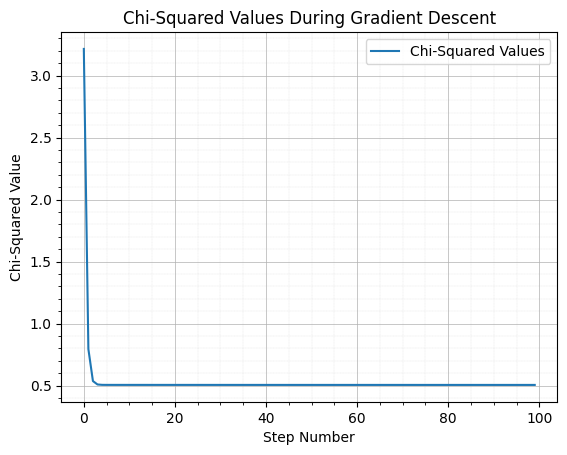

In [5]:
def gradient_descent_1(Sto_steps, theta, eta, x_samples, y_truth):
    """
    Stochastic gradient descent function.

    Inputs:
    Sto_steps: Number of steps in the gradient descent.
    theta: Initial coefficients of the polynomial.
    eta: Learning rate.
    x_samples: Sampled x values.
    y_truth: True y values for the sampled x values.

    Returns:
    Updated theta values and array of chi-squared values for each step
    """
    chisq_values = np.zeros(Sto_steps)
    for i in range(Sto_steps):
        y_model = polyModelWithNoise(x_samples, theta, 0)
        deviation = y_model - y_truth
        gradient = np.average(deviation[:, None] * polyGradient(x_samples, theta), axis=0)
        theta -= eta * gradient
        chisq_values[i] = np.average(deviation**2)
    return theta, chisq_values

# Parameters for descent
# Initial theta vals
initial_theta = [-1, 0.5]   

# Learning rate
eta = 0.5                   

# Number of steps
Sto_steps = 100            

# Random x values
x_samples = np.random.uniform(0, 1, 10)  

# True values
y_truth = polyModelWithNoise(x_samples, [0, 2], 0.5)  

# Running the gradient descent
final_theta, chisq_values = gradient_descent_1(Sto_steps, initial_theta, eta, x_samples, y_truth)

# Plotting the chi-squared values
plt.plot(chisq_values, label='Chi-Squared Values')
plt.xlabel('Step Number')
plt.ylabel('Chi-Squared Value')
plt.title('Chi-Squared Values During Gradient Descent')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()


# First model graphed

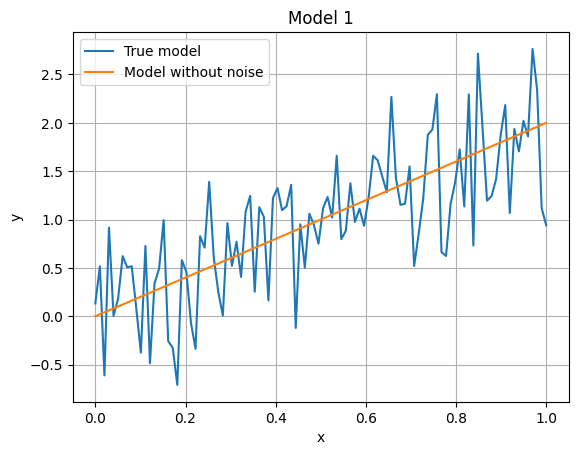

In [6]:
# True model y values to compare to the theta values
y_values = true_func(x) 
fig, ax = plt.subplots()
ax.plot(x,y_values,label=r"True model")
ax.plot(x,polyModelWithNoise(x,theta,sigma=0),label=r'Model without noise')
ax.set_xlabel("x")
ax.grid()
ax.set_ylabel("y")
ax.set_title("Model 1")
ax.legend()

# Graph with updated theta values model:

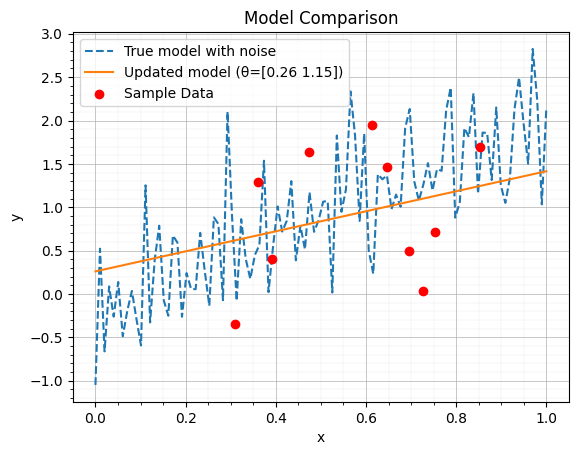

In [7]:
descended_theta, chisq_values = gradient_descent_1(Sto_steps, initial_theta, eta, x_samples, y_truth)



fig, ax = plt.subplots()

# Plot the true model
x_plot = np.linspace(0, 1, 100)
y_true = polyModelWithNoise(x_plot, theta, sigma)
ax.plot(x_plot, y_true, label="True model with noise", linestyle='--')

# Plot the model with the final value of theta from gradient descent but no noise on y_updated
y_updated = polyModelWithNoise(x_plot, descended_theta, 0)  
ax.plot(x_plot, y_updated, label=f"Updated model (θ={descended_theta.round(2)})")

# Sample data points
ax.scatter(x_samples, y_truth, color='red', label='Sample Data', zorder=5)  

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Model Comparison")
ax.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()


# Graph with multiple polynomials

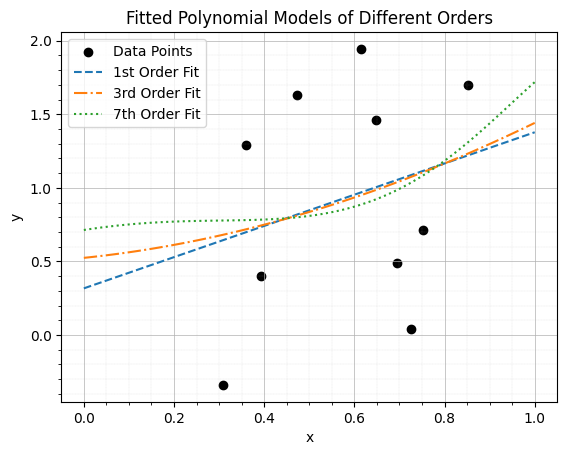

In [8]:
# Function to fit any order polynomial
def fit_polynomial(order, x_data, y_data, eta, steps):
    # Random theta initialisation
    theta = np.random.randn(order + 1)  
    for _ in range(steps):
        y_model = polyModelWithNoise(x_data, theta, 0)
        deviation = y_model - y_data
        gradient = np.average(deviation[:, None] * polyGradient(x_data, theta), axis=0)
        theta -= eta * gradient
    return theta

# Fit models of orders 1/3/7
theta_1st_order = fit_polynomial(1, x_samples, y_truth, eta, Sto_steps)
theta_3rd_order = fit_polynomial(3, x_samples, y_truth, eta, Sto_steps)
theta_7th_order = fit_polynomial(7, x_samples, y_truth, eta, Sto_steps)

# Plotting the models
x_plot = np.linspace(0, 1, 100)
plt.scatter(x_samples, y_truth, label='Data Points', color='black')
plt.plot(x_plot, polyModelWithNoise(x_plot, theta_1st_order, 0), label='1st Order Fit', linestyle='--')
plt.plot(x_plot, polyModelWithNoise(x_plot, theta_3rd_order, 0), label='3rd Order Fit', linestyle='-.')
plt.plot(x_plot, polyModelWithNoise(x_plot, theta_7th_order, 0), label='7th Order Fit', linestyle=':')
plt.title('Fitted Polynomial Models of Different Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()


# Extended Range Fit for multiple polynomials:

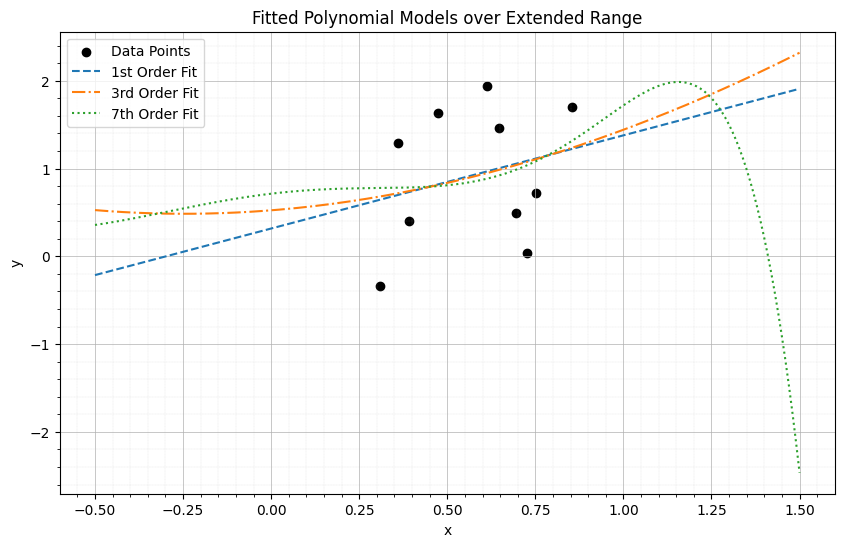

In [9]:
# Extended plot range
x_extended = np.linspace(-0.5, 1.5, 200)

y_1st_order = polyModelWithNoise(x_extended, theta_1st_order, 0)
y_3rd_order = polyModelWithNoise(x_extended, theta_3rd_order, 0)
y_7th_order = polyModelWithNoise(x_extended, theta_7th_order, 0)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_samples, y_truth, label='Data Points', color='black')
plt.plot(x_extended, y_1st_order, label='1st Order Fit', linestyle='--')
plt.plot(x_extended, y_3rd_order, label='3rd Order Fit', linestyle='-.')
plt.plot(x_extended, y_7th_order, label='7th Order Fit', linestyle=':')
plt.title('Fitted Polynomial Models over Extended Range')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()

# Conclusion:

The first and third order fits within the specified data range fit the data well and the seventh order fits even better. However, within the extended data range the seventh order has a very poor fit and the third has a poor fit. The first order fit stays valid within the extended range.